In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#step 1: Sample dataset (10 records, 3 features)
data = np.array([
      [2.5 , 2.4, 1.2],
      [0.5, 0.7, 0.3],
      [2.2, 2.9, 1.4],
      [1.9 ,2.2, 1.1],
      [2.8, 1.6, 1.8],
      [3.1, 3.0, 1.5],
      [1.5, 2.3, 3.6],
      [1.8, 2.4, 3.3],
      [2.7, 2.9, 4.3],
      [1.8, 3.1, 1.4],


])

In [ ]:
df = pd.DataFrame(data, columns=["X","Y","Z"])

In [ ]:
df

,X,Y,Z
0,2.5,2.4,1.2
1,0.5,0.7,0.3
2,2.2,2.9,1.4
3,1.9,2.2,1.1
4,2.8,1.6,1.8
5,3.1,3.0,1.5
6,1.5,2.3,3.6
7,1.8,2.4,3.3
8,2.7,2.9,4.3
9,1.8,3.1,1.4


In [ ]:
#step 2: Standardization uaing pandas (avoidsd NaN issues)
standardized_data = (df - df.mean()) / df.std()

In [ ]:
#step 3 : Covariance matrix
cov_matrix = np.cov(standardized_data.T)
cov_matrix


array([[1.        , 0.59455937, 0.23830946],
       [0.59455937, 1.        , 0.37386826],
       [0.23830946, 0.37386826, 1.        ]])

In [ ]:
#Step 4
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print(eig_vals)
print(eig_vecs)

[1.82381657 0.38544816 0.79073527]
[[-0.6022132  -0.6388186  -0.47880064]
 [-0.64692181  0.74191918 -0.1762047 ]
 [-0.46779422 -0.20363379  0.86005921]]


In [ ]:
#step 5: Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eig_vals)[::-1]
sorted_eig_vals = eig_vals[sorted_indices]
sorted_eig_vecs = eig_vecs[:, sorted_indices]

In [30]:
#Step 6 :Select top 2 eigenvectors
eig_vecs_subset = eig_vecs[:, :2]

In [32]:
#step 7: project data to new basis
reduced_data = standardized_data.to_numpy().dot(eig_vecs_subset)
reduced_df = pd.DataFrame(reduced_data, columns=["PC1", "PC2"])


In [33]:
#step 8: Output the reduced data
print("\nReduced Data (after PCA):\n, ", reduced_df)


Reduced Data (after PCA):
,          PC1       PC2
0 -0.090660 -0.179157
1  3.317657 -0.057138
2 -0.362859  0.544870
3  0.598353  0.142078
4  0.153470 -1.331336
5 -1.202933 -0.130064
6 -0.080272  0.184374
7 -0.297484  0.079169
8 -1.815408 -0.336261
9 -0.219865  1.083466


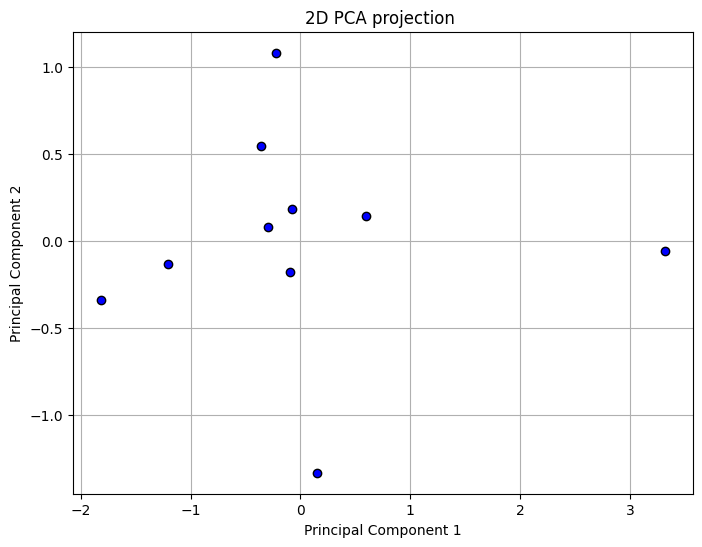

In [34]:
#step 9 : Visualize
plt.figure(figsize=(8,6))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], color='blue', edgecolor='k')
plt.title('2D PCA projection ')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
